Set-up

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

#Load the data
df = pd.read_csv(r"C:\Users\Khang Le\Desktop\CS 506\cs506-project\datasets\processed_data\encoded_cleaned_recruitment_data.csv", index_col=0)
print(df.columns.tolist())

['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy', 'HiringDecision', 'Gender_encoded', 'RecruitmentStrategy_encoded', 'EducationLevel_encoded']


1. Correlation Heatmap
- Shows how the four key numerical variables (InterviewScore, SkillScore, PersonalityScore, and ExperienceYears) relate to one another. Darker cells indicate stronger positive or negative correlations, helping you spot which factors tend to move together (e.g., whether higher SkillScore aligns with better InterviewScore).

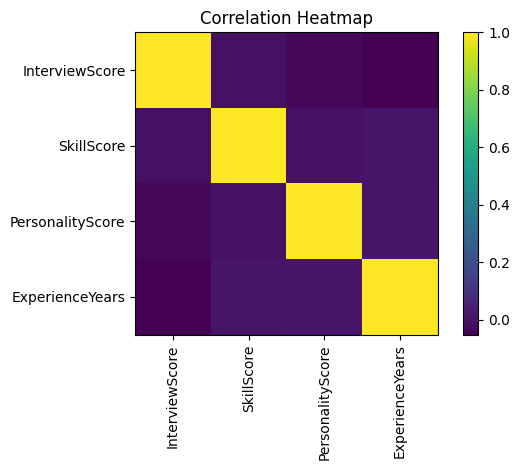

In [8]:
corr = df[['InterviewScore', 'SkillScore', 'PersonalityScore', 'ExperienceYears']].corr()
plt.figure()
plt.imshow(corr)
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


2. Scatter Plot: SkillScore vs. InterviewScore by HiringDecision
- Plots individual candidates’ SkillScore against their InterviewScore, using different markers for those who were hired versus not. This makes it easy to see the skill–interview relationship and how successful hires cluster compared to those who weren’t chosen.

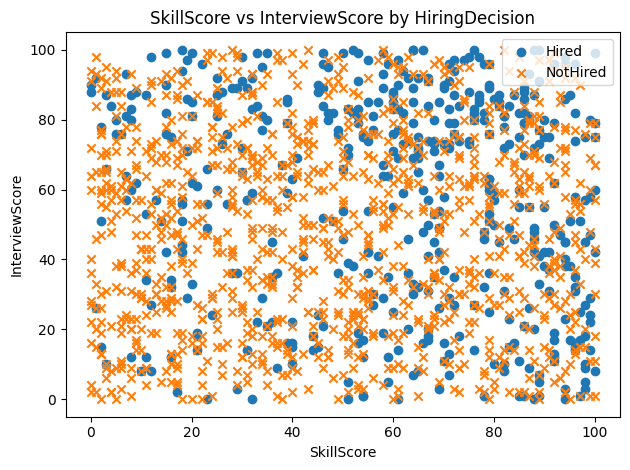

In [9]:
plt.figure()
hired = df[df['HiringDecision'] == 1]
not_hired = df[df['HiringDecision'] == 0]
plt.scatter(hired['SkillScore'], hired['InterviewScore'], marker='o', label='Hired')
plt.scatter(not_hired['SkillScore'], not_hired['InterviewScore'], marker='x', label='NotHired')
plt.xlabel('SkillScore')
plt.ylabel('InterviewScore')
plt.title('SkillScore vs InterviewScore by HiringDecision')
plt.legend()
plt.tight_layout()
plt.show()


3. Boxplot of PersonalityScore by EducationLevel
- Compares the distribution of PersonalityScore across education groups (High School, Bachelor, Master, PhD). You can immediately see medians, variability, and outliers, highlighting whether, for example, PhD candidates tend to have higher or more consistent personality ratings.

C:\Users\Khang Le\AppData\Local\Temp\ipykernel_40328\3641986973.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


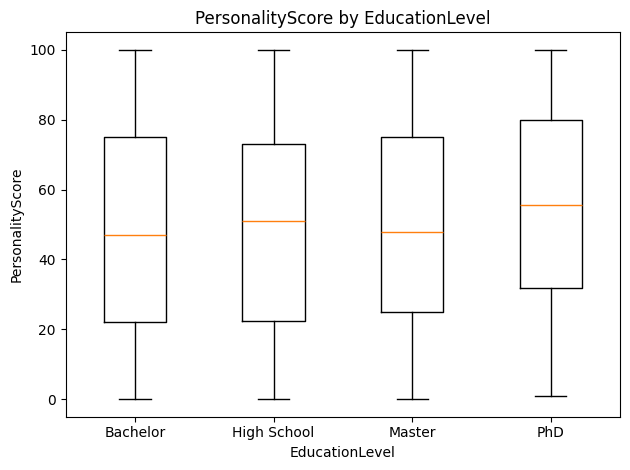

In [10]:
groups = df.groupby('EducationLevel')['PersonalityScore'] 
labels = list(groups.groups.keys())
data_to_plot = [groups.get_group(l) for l in labels]
plt.figure()
plt.boxplot(data_to_plot, labels=labels)
plt.xlabel('EducationLevel')
plt.ylabel('PersonalityScore')
plt.title('PersonalityScore by EducationLevel')
plt.tight_layout()
plt.show()


4. Bar Chart of Hiring Rate by RecruitmentStrategy and EducationLevel
- Shows the percentage of candidates hired for each recruitment channel (Referral, Online, Agency), broken out by education level. This reveals which strategies work best overall and whether their effectiveness differs for, say, bachelor’s versus master’s applicants.

<Figure size 640x480 with 0 Axes>

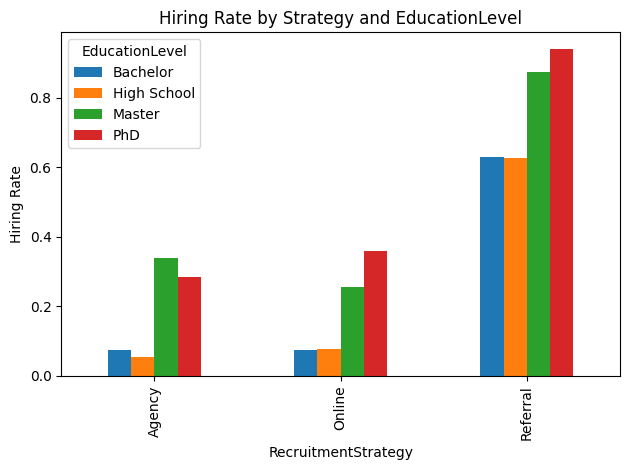

In [11]:
pivot = df.groupby(['RecruitmentStrategy', 'EducationLevel'])['HiringDecision'].mean().unstack()
plt.figure()
pivot.plot(kind='bar')
plt.xlabel('RecruitmentStrategy')
plt.ylabel('Hiring Rate')
plt.title('Hiring Rate by Strategy and EducationLevel')
plt.tight_layout()
plt.show()

5. Parallel Coordinates: Hired vs. Not Hired Profiles
- Overlays normalized lines for hired and not-hired groups across multiple metrics (InterviewScore, SkillScore, PersonalityScore, ExperienceYears). It gives a holistic “average profile” of each group, illustrating which combination of factors most distinguishes successful candidates.

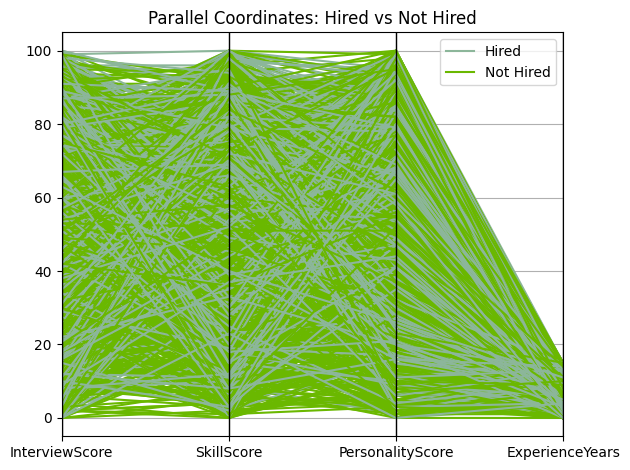

In [12]:
df_pc = df[['InterviewScore', 'SkillScore', 'PersonalityScore', 'ExperienceYears', 'HiringDecision']].copy()
df_pc['HiringDecision'] = df_pc['HiringDecision'].map({0: 'Not Hired', 1: "Hired"})
plt.figure()
parallel_coordinates(df_pc, 'HiringDecision')
plt.title("Parallel Coordinates: Hired vs Not Hired")
plt.tight_layout()
plt.show()